In [65]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt


### Download data

In [90]:
%%bash

wget -nc -O news-final.csv http://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/News_Final.csv 

wget -nc -O facebook-microsoft.csv http://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/Facebook_Microsoft.csv
wget -nc -O googleplus-microsoft.csv http://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/GooglePlus_Microsoft.csv
wget -nc -O linkedin-microsoft.csv http://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/LinkedIn_Microsoft.csv


File ‘news-final.csv’ already there; not retrieving.
File ‘facebook-microsoft.csv’ already there; not retrieving.
File ‘googleplus-microsoft.csv’ already there; not retrieving.
File ‘linkedin-microsoft.csv’ already there; not retrieving.


CalledProcessError: Command 'b'\nwget -nc -O news-final.csv http://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/News_Final.csv \n\nwget -nc -O facebook-microsoft.csv http://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/Facebook_Microsoft.csv\nwget -nc -O googleplus-microsoft.csv http://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/GooglePlus_Microsoft.csv\nwget -nc -O linkedin-microsoft.csv http://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/LinkedIn_Microsoft.csv\n'' returned non-zero exit status 1.

### Load data and set index

In [91]:
news = pd.read_csv('news-final.csv')
news = news[news['Topic']=='microsoft']
news = news.drop('Topic', 1)

news['IDLink'] = news['IDLink'].astype(int)
news = news.set_index('IDLink')


facebook = pd.read_csv('facebook-microsoft.csv')
facebook = facebook.set_index('IDLink')

google = pd.read_csv('googleplus-microsoft.csv')
google = google.set_index('IDLink')

linkedin = pd.read_csv('linkedin-microsoft.csv')
linkedin = linkedin.set_index('IDLink')


In [92]:
news.head()

,Title,Headline,Source,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
IDLink,,,,,,,,,
27790,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1
27803,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft...",New Kerala,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1
27813,Microsoft Project Centennial seen with “univer...,"Microsoft may have burned off one bridge, but ...",SlashGear,2015-03-01 02:14:00,0.000000,0.002550,-1,-1,-1
27812,Microsoft sneaks onto Android while Android sn...,The platform battles are back MWC16 +Analysis ...,The Register,2015-03-01 02:15:00,0.000000,0.052670,-1,-1,-1
27814,"HoloLens dev edition costs £2,000 with new Con...",Microsoft’s AR headset is being made available...,Metro,2015-03-01 02:18:00,0.000000,0.079434,-1,-1,-1


### Restrict to articles appearing on all 3 sites

In [93]:
posted_everywhere = news[['Facebook', 'GooglePlus', 'LinkedIn']].min(axis=1) > -1

news = news[posted_everywhere]

In [94]:
news.head()

,Title,Headline,Source,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
IDLink,,,,,,,,,
311,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,International Business Times via Yahoo UK & Ir...,2015-11-08 05:25:00,0.000000,-0.132812,0,0,0
307,Microsoft scales back free online storage plans,NEW YORK — Microsoft is getting stingy with on...,The Columbian,2015-11-08 06:54:00,0.106303,-0.207333,0,0,0
299,Microsoft’s OneDrive debacle shows its cloud c...,When Microsoft announced earlier this week tha...,Digital Trends via Yahoo! News,2015-11-08 12:15:00,-0.166139,-0.259052,6,0,1
328,Microsoft to play a big part in Digital India,"Bhaskar Pramanik, Chairman, Microsoft India, s...",DNA India,2015-11-08 16:47:00,-0.018326,0.062500,11,1,1
587,Microsoft risks IT ire with Windows 10 update ...,Microsoft has made it clear that it will take...,MIS Asia,2015-11-08 18:54:00,-0.165728,0.146390,89,0,0


### Restrict to sources with at least 50 articles

In [95]:
greater_than_50 = (news['Source'].value_counts() > 50)

sources_50 = greater_than_50[greater_than_50 > 0].index

print("Number of sources with at least 50 articles: {}".format(greater_than_50.sum()))

news = news[news['Source'].isin(sources_50)]


Number of sources with at least 50 articles: 75


### Process dates

In [96]:
news.head()

,Title,Headline,Source,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
IDLink,,,,,,,,,
311,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,International Business Times via Yahoo UK & Ir...,2015-11-08 05:25:00,0.000000,-0.132812,0,0,0
299,Microsoft’s OneDrive debacle shows its cloud c...,When Microsoft announced earlier this week tha...,Digital Trends via Yahoo! News,2015-11-08 12:15:00,-0.166139,-0.259052,6,0,1
587,Microsoft risks IT ire with Windows 10 update ...,Microsoft has made it clear that it will take...,MIS Asia,2015-11-08 18:54:00,-0.165728,0.146390,89,0,0
476,Microsoft readies its next major Windows 10 Fa...,Microsoft is on the verge of issuing its first...,SiliconANGLE,2015-11-08 21:50:00,0.004360,0.210430,4,2,4
116,"Microsoft Analytics, Intel IoT, Spokeo Vs. Rob...",Microsoft updated its CRM and SQL offerings an...,InformationWeek,2015-11-09 00:00:00,0.037881,0.225037,49,16,57


In [97]:
news.loc[:, 'PublishDate'] = pd.to_datetime(news['PublishDate'])

news.loc[:, 'Year'] = news['PublishDate'].dt.year
news.loc[:, 'Month'] = news['PublishDate'].dt.month
news.loc[:, 'DayOfWeek'] = news['PublishDate'].dt.weekday
news.loc[:, 'Hour'] = news['PublishDate'].dt.hour

In [98]:
import datetime

In [99]:
news['PublishDate'].max()

may_1_2016 = datetime.datetime(2016, 5, 1)

news_historical = news[news['PublishDate'] <= may_1_2016]
news_new = news[news['PublishDate'] > may_1_2016]

In [100]:
news_new.to_csv('news-new.csv')

### Summary viz

In [101]:
news.head(2)

,Title,Headline,Source,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Year,Month,DayOfWeek,Hour
IDLink,,,,,,,,,,,,,
311,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,International Business Times via Yahoo UK & Ir...,2015-11-08 05:25:00,0.000000,-0.132812,0,0,0,2015,11,6,5
299,Microsoft’s OneDrive debacle shows its cloud c...,When Microsoft announced earlier this week tha...,Digital Trends via Yahoo! News,2015-11-08 12:15:00,-0.166139,-0.259052,6,0,1,2015,11,6,12


**Year published**

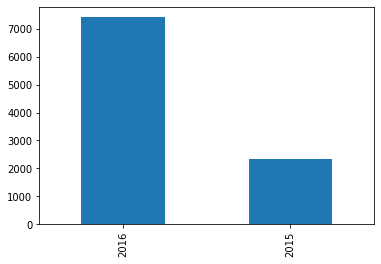

In [102]:
news['Year'].value_counts().plot.bar()

**Day of week**

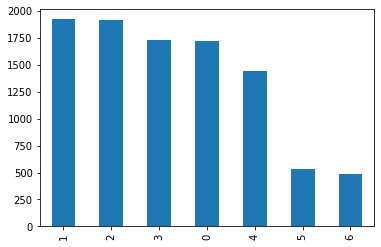

In [103]:
news['PublishDate'].dt.weekday.value_counts().plot.bar()

**Sentiment**

In [105]:
news['ones'] = 1

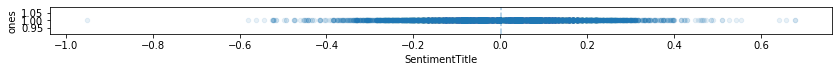

In [106]:
news.plot.scatter('SentimentTitle', 'ones', alpha=0.1, figsize=(14, 0.5))

plt.axvline(news['SentimentTitle'].mean(), alpha = 0.4, ls='--')

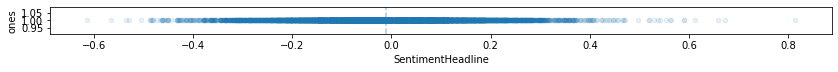

In [107]:
news.plot.scatter('SentimentHeadline', 'ones', alpha=0.1, figsize=(14, 0.5))

plt.axvline(news['SentimentHeadline'].mean(), alpha = 0.4, ls='--')

## ML

In [79]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import base

In [80]:
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  # We will need these in transform()
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
        return X[self.col_names].values  #REMOVE

In [81]:
df = news_historical.drop(['PublishDate', 'Title', 'Headline'], 1)

In [82]:
source_pipe = Pipeline([
    ('cst', ColumnSelectTransformer(['Source'])),
    ('oh', OneHotEncoder())
]) 

source_pipe.fit_transform(df)

hour_pipe = Pipeline([
    ('cst', ColumnSelectTransformer(['Hour'])),
    ('oh', OneHotEncoder())
]) 

sentiment_pipe = Pipeline([
    ('cst', ColumnSelectTransformer(['SentimentTitle', 'SentimentHeadline']))
])

features = FeatureUnion([
    ('source', source_pipe),
    ('hour', hour_pipe),
    ('sentiment', sentiment_pipe)
])


features.fit_transform(df)

<7941x101 sparse matrix of type '<class 'numpy.float64'>'
	with 30127 stored elements in Compressed Sparse Row format>

In [83]:
facebook_model = Pipeline([
    ('features', features),
    ('model', LinearRegression())
])

facebook_model.fit(df, df['Facebook'])

google_model = Pipeline([
    ('features', features),
    ('model', LinearRegression())
])

google_model.fit(df, df['GooglePlus'])

linkedin_model = Pipeline([
    ('features', features),
    ('model', LinearRegression())
])

linkedin_model.fit(df, df['LinkedIn'])

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('source',
                                                 Pipeline(memory=None,
                                                          steps=[('cst',
                                                                  ColumnSelectTransformer(col_names=['Source'])),
                                                                 ('oh',
                                                                  OneHotEncoder(categories='auto',
                                                                                drop=None,
                                                                                dtype=<class 'numpy.float64'>,
                                                                                handle_unknown='error',
                                                                                sparse=True))],
                

## Validate models

In [84]:
df_new = news_new

In [108]:
print('Facebook')
print('training: {}'.format(facebook_model.score(df, df['Facebook'])))
print('testing: {}'.format(facebook_model.score(df_new, df_new['Facebook'])))

Facebook
training: 0.0776331812620148
testing: -0.05171044995624863


In [109]:
print('GooglePlus')
print('training: {}'.format(google_model.score(df, df['GooglePlus'])))
print('testing: {}'.format(google_model.score(df_new, df_new['GooglePlus'])))

GooglePlus
training: 0.1376722439961484
testing: 0.15523238347408452


In [110]:
print('LinkedIn')
print('training: {}'.format(linkedin_model.score(df, df['LinkedIn'])))
print('testing: {}'.format(linkedin_model.score(df_new, df_new['LinkedIn'])))

LinkedIn
training: 0.18848487805116754
testing: 0.1992734891028325


## Use models

In [111]:
facebook_predict = facebook_model.predict(df_new)

google_predict = google_model.predict(df_new)

linkedin_predict = linkedin_model.predict(df_new)

In [112]:
df_new['FacebookPrediction'] = facebook_predict

df_new['GooglePrediction'] = google_predict

df_new['LinkedInPrediction'] = linkedin_predict

### Compare predicted resutls

In [114]:
df_new[['Title', 'Source', 'PublishDate', 
        'Facebook', 'FacebookPrediction', 
        'GooglePlus', 'GooglePrediction', 
        'LinkedIn', 'LinkedInPrediction']]\
.head()

,Title,Source,PublishDate,Facebook,FacebookPrediction,GooglePlus,GooglePrediction,LinkedIn,LinkedInPrediction
IDLink,,,,,,,,,
46462,Get a $50 Microsoft Store gift card with Xbox ...,Windows Central,2016-05-01 08:47:22,9,11.570160,2,2.577800,1,-7.440152
46791,Flow is Microsoft’s answer to IFTTT,Digital Trends via Yahoo! News,2016-05-01 11:10:00,0,13.221109,0,0.030471,0,6.861964
46538,Microsoft's IE loses top browser spot to Googl...,Computer World Australia,2016-05-01 11:31:00,111,44.621996,0,0.909720,6,9.187982
46542,This Microsoft legend says the the company is ...,Business Insider via Yahoo! Finance,2016-05-01 11:39:00,1,23.466905,0,0.650514,0,16.039449
46569,Windows 10 Mobile Build 10586.306 now being te...,MSPoweruser.com,2016-05-01 14:00:21,23,-2.763371,0,-1.326493,0,10.164756


## TODO: Predict max